## Decision Tree Regression in Python with sklearn

### By Thomas Oswald

#### Sprin 2020, Data 4319

Decision Trees is a supervised learning method used for classification and regression.  In this notebook, use the decesion tree functionality from the sklearn library on some randomly generated data for the purpose of regression and predicting.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeRegressor

In [6]:
# Create random data
r = np.random.RandomState(1)
X = r.rand(80,1)
X = 2*X
Y = []
for i in X:
    Y.append(-2*i**3 + 5*i**2 + i)
    
# change from list to np array
Y = np.asarray(Y)
Y = Y.flatten()

# replace some entries with random data thats off from the function above
Y[::6] += 4*(0.2 + r.rand(len(Y[::6])))
Y[::4] += 2*(0.1 - r.rand(len(Y[::4])))

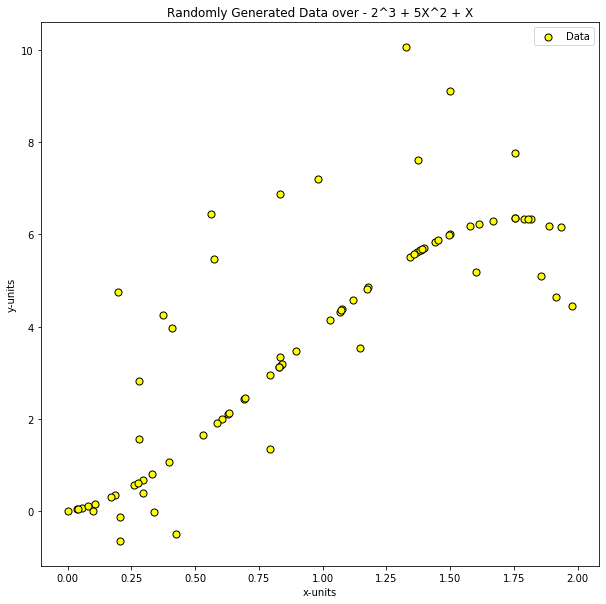

In [7]:
# Scatter plot the measurements
fig = plt.figure(figsize=(10,10))

plt.scatter(X,
            Y,
            s=50,
            edgecolor="black",
            c="yellow",
            label = "Data")

plt.title("Randomly Generated Data over - 2^3 + 5X^2 + X")
plt.xlabel('x-units')
plt.ylabel('y-units')
plt.legend()

### Fir a regression model using DecisionTreeRegressor from sklearn

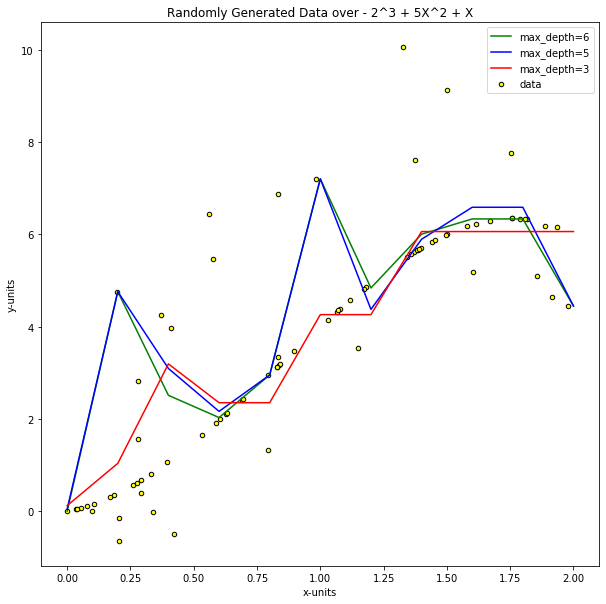

In [8]:
regr_1 = DecisionTreeRegressor(max_depth =6)
regr_1.fit(X,Y)

regr_2 = DecisionTreeRegressor(max_depth =5)
regr_2.fit(X,Y)

regr_3 = DecisionTreeRegressor(max_depth =3)
regr_3.fit(X,Y)


X_test = np.arange(0.0, 2.2, 0.2)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Scatter plot the measurements
fig = plt.figure(figsize=(10,10))

plt.scatter(X,
            Y,
            s=20,
            edgecolor="black",
            c="yellow", 
            label = "data")

plt.plot(X_test,
        y_1,
        c="green",
        label="max_depth=6")

plt.plot(X_test,
        y_2,
        c="blue",
        label="max_depth=5")

plt.plot(X_test,
        y_3,
        c="red",
        label="max_depth=3")


plt.title("Randomly Generated Data over - 2^3 + 5X^2 + X")
plt.xlabel('x-units')
plt.ylabel('y-units')
plt.legend()

With the use of sklearn and the Decision Tree Regression library, we were able to plot a regresison line over some randomly generated data and come up with an appropriate max depth for this "tree" as 3. This max depth is the length of the longest path from the root to a "leaf".  The size of this tree is (2*3+1)-1.

There are some obvious errors around the 0.50 and 1.00 range of x-units but this is due to the holes in the data which is caused by the randomness of the generated data.